# Trabalho prático 1

## Exercício 1

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.colors as clr
import numpy as np
import cv2
import scipy.fftpack as fft
import math as m

In [2]:
img1 = Image.open('./imagens/peppers.bmp')
img1 = img1.convert('RGB')
img1.save('./imagens/peppers_compressed_ultra_high.jpg', quality=100)
img1.save('./imagens/peppers_compressed_high.jpg', quality=75)
img1.save('./imagens/peppers_compressed_medium.jpg', quality=50)
img1.save('./imagens/peppers_compressed_low.jpg', quality=25)

img2 = Image.open('./imagens/logo.bmp')
img2 = img2.convert('RGB')
img2.save('./imagens/logo_compressed_ultra_high.jpg', quality=100)
img2.save('./imagens/logo_compressed_high.jpg', quality=75)
img2.save('./imagens/logo_compressed_medium.jpg', quality=50)
img2.save('./imagens/logo_compressed_low.jpg', quality=25)

img3 = Image.open('./imagens/barn_mountains.bmp')
img3 = img3.convert('RGB')
img3.save('./imagens/barn_mountains_compressed_ultra_high.jpg', quality=100)
img3.save('./imagens/barn_mountains_compressed_high.jpg', quality=75)
img3.save('./imagens/barn_mountains_compressed_medium.jpg', quality=50)
img3.save('./imagens/barn_mountains_compressed_low.jpg', quality=25)

In [3]:
def compress_graph(image_name):
    img = Image.open(f'./imagens/{image_name}').convert('RGB')
    quality = []
    size = []
    for i in range(100, -1, -1):
        img.save(f'./imagens/animations/{image_name}_{i}.jpg', quality=i)
        quality.append(i)
    
    for i in range(100, -1, -1):
        size.append(os.path.getsize(f'./imagens/animations/{image_name}_{i}.jpg')/1000)
    
    images = []

    for i in range(100, -1, -1):
        img = Image.open(f'./imagens/animations/{image_name}_{i}.jpg')
        images.append(img)

    images[0].save(f'./imagens/{image_name}.gif', save_all=True, append_images=images[1:], optimize=False, duration=2)

    plt.figure()
    plt.title(f'Relação entre qualidade e o tamanho da compressão JPG de: {image_name}')
    plt.plot(quality, size)
    plt.xlabel('Quality')
    plt.ylabel('Size (KB)')
    plt.show()

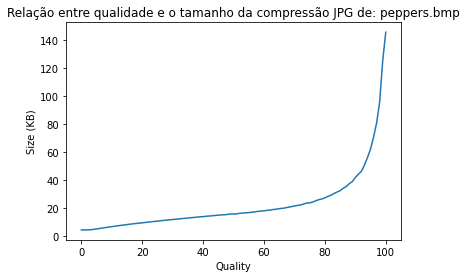

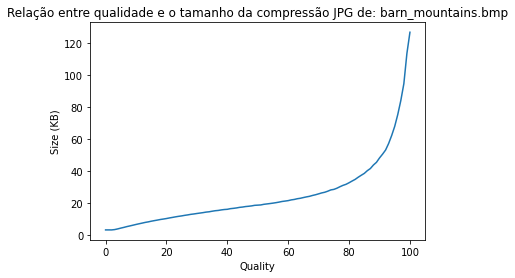

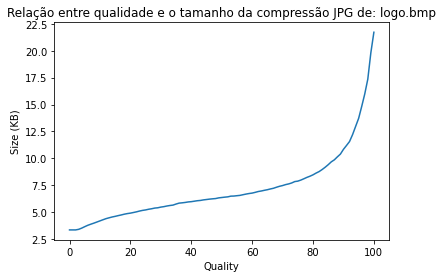

In [4]:
compress_graph('peppers.bmp')
compress_graph('barn_mountains.bmp')
compress_graph('logo.bmp')

### Resultados e Conclusões

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/logo.bmp' width=400 heigh=200/> |<img src='imagens/logo_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/logo_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/logo_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/logo_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/logo.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 |
| Size (KB) | 422KB | 22KB | 8KB| 7KB| 6KB | --- |
| Compression Rate | --- | 94.79% | 98,10% | 98.34% | 98,58% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/peppers.bmp' width=400 heigh=200/> |<img src='imagens/peppers_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/peppers_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/peppers_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/peppers_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/peppers.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 |
| Size (KB) | 577KB | 142KB |24KB | 16KB | 11KB| --- |
| Compression Rate | --- | 75.39% | 95,85% | 97,23% | 98,09% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/barn_mountains.bmp' width=400 heigh=200/> |<img src='imagens/barn_mountains_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/barn_mountains_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/barn_mountains_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/barn_mountains_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/barn_mountains.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 |
| Size (KB) | 349KB| 124KB | 28KB | 19KB | 12KB | --- |
| Compression Rate | --- | 64.47% | 91.98% | 94.56% | 96.56% | --- |

A imagem logo.bmp, mesmo com uma qualidade alta (75%), já apresenta uma leve distorção no contorno das figuras e, à medida que a qualidade diminui, esta distorção vai ficando cada vez mais evidente. A razão pela qual podemos verificar ruído com uma qualidade de compressão alta, deve-se ao facto de existir um elevado contraste entre as tonalidades das formas e o fundo (só existem três cores com apenas uma tonalidade cada uma).

Na imagem peppers.bmp, apenas começam a ser perceptíveis perturbações a partir da qualidade média (50%). A razão para tal provém da imagem conter transições mais suaves em comparação com a imagem logo.bmp.

Por fim, na imagem barn_mountains.bmp, não existe uma discrepância da qualidade visual tão saliente entre todos os níveis de compressão uma vez que esta tem essencialmente transições suaves. No entanto, é possível distiguir-se algumas zonas pixelizadas quando a qualidade de compressão é baixa.

De um modo geral, as imagens foto-realistas, como é o caso da peppers.bmp e da barn_mountains.bmp, conseguem alcançar maiores taxas de compressão sem grande perda percetual. Estes resultados encontram-se de acordo com o esperado pois sabemos que o JPEG utiliza métodos de compressão pensados para imagens foto-realistas.

## Exercício 3

In [5]:
## read image
def read_image(image_name):
    image = np.array(plt.imread(image_name))
    return image


In [6]:
## create colormap
def create_colormap(color_list, name='cmap'):
    return clr.LinearSegmentedColormap.from_list(name, color_list, N=256)


In [7]:
graymap = create_colormap(['black', 'white'], 'blackwhite')

In [8]:
def plot_image(image, colormap=graymap, title=""):
    plt.figure() 
    plt.title(title)
    plt.imshow(image, colormap)
    #plt.axis('off')
    plt.show()

In [9]:
def plot_image_colorbar(image, title=''):
    plt.figure()
    plt.title(title)
    plt.imshow(image)
    plt.colorbar()
    plt.show()

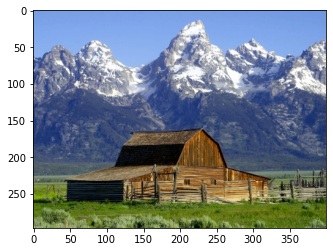

In [10]:
image = read_image('./imagens/barn_mountains.bmp')
plot_image(image)


In [11]:
red_map = create_colormap(['black', 'red'], 'redmap')
green_map = create_colormap(['black', 'green'], 'greenmap')
blue_map = create_colormap(['black', 'blue'], 'bluemap')
random_map = create_colormap(['blue', 'orange', 'pink'], 'randommap')

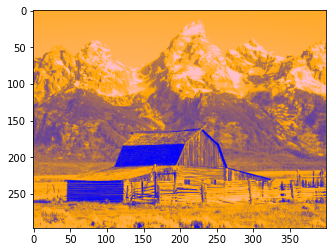

In [12]:
plot_image(image[:, :, 1], random_map)

In [13]:
def get_image_rgb(image):
    return np.array((image[:, :, 0], image[:, :, 1], image[:, :, 2]))

In [14]:
def get_image_from_channels(channels):
    lines, columns = channels[0].shape
    img = np.zeros((lines, columns, 3), dtype=np.uint8)
    img[:, :, 0] = channels[0]
    img[:, :, 1] = channels[1]
    img[:, :, 2] = channels[2]
    return img

(3, 297, 400)


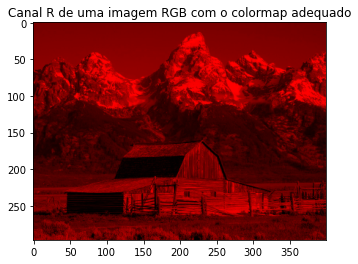

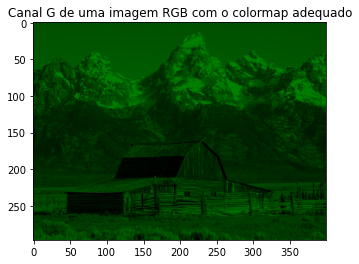

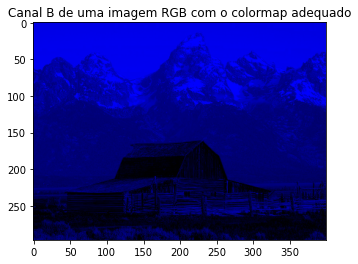

In [15]:
img_rgb = get_image_rgb(image)
print(img_rgb.shape)
plot_image(img_rgb[0], red_map, 'Canal R de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[1], green_map, 'Canal G de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[2], blue_map, 'Canal B de uma imagem RGB com o colormap adequado')

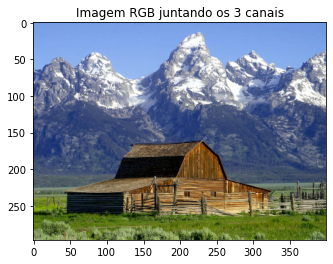

In [16]:
plot_image(get_image_from_channels(img_rgb), title='Imagem RGB juntando os 3 canais')

# Exercicio 4

In [17]:
def add_padding(image, padding=16):
    rows, columns, _ = image.shape
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]

    # add rows
    if rows % padding != 0:
        rows_to_add = padding - rows % padding

        aux_red = np.tile(red[-1, :], (rows_to_add, 1))
        aux_green = np.tile(green[-1, :], (rows_to_add, 1))
        aux_blue = np.tile(blue[-1, :], (rows_to_add, 1))

        red = np.vstack([red, aux_red])
        green = np.vstack([green, aux_green])
        blue = np.vstack([blue, aux_blue])
    
    # add columns
    if columns % padding != 0:
        columns_to_add = padding - columns % padding

        aux_red = np.tile(red[:, -1], (columns_to_add, 1))
        aux_green = np.tile(green[:, -1], (columns_to_add, 1))
        aux_blue = np.tile(blue[:, -1], (columns_to_add, 1))

        red = np.hstack([red, aux_red.T])
        green = np.hstack([green, aux_green.T])
        blue = np.hstack([blue, aux_blue.T])
    
    return get_image_from_channels((red, green, blue))

Before:  (297, 400, 3)
After:  (304, 400, 3)


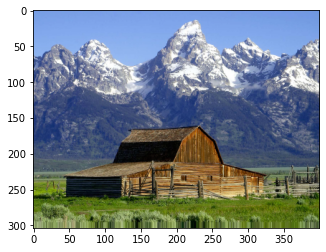

In [18]:
image = read_image('./imagens/barn_mountains.bmp')
print("Before: ", image.shape)
image = add_padding(image)
print("After: ", image.shape)
plot_image(image)

In [19]:
def revert_padding(image, original_rows, original_columns):
    rows, columns, _ = image.shape
    if rows < original_rows or columns < original_columns:
        return image
    
    return image[:original_rows, :original_columns, :]


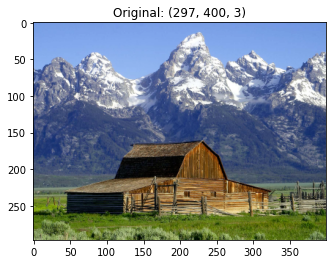

In [20]:
image = read_image('./imagens/barn_mountains.bmp')
plot_image(image, title=f'Original: {image.shape}')
original_rows, original_columns, _ = image.shape

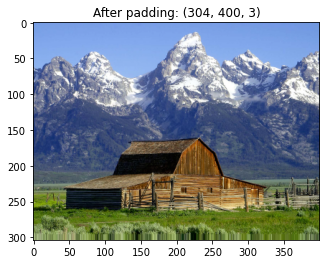

In [21]:
image = add_padding(image)
plot_image(image, title=f'After padding: {image.shape}')

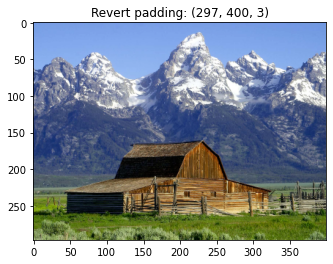

In [22]:
image = revert_padding(image, original_rows, original_columns)
plot_image(image, title=f'Revert padding: {image.shape}')

## Exercício 5

### Conversão para o modelo cor YCbCr

In [23]:
def convert_rgb_to_ycbcr(image):
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    aux = image.dot(ycbcr_matrix.T)
    aux[:, :, 1:3] += 128
    aux[aux > 255] = 255
    aux[aux < 0] = 0
    aux = aux.round()
    return np.uint8(aux)

In [24]:
def convert_ycbcr_to_rgb(image):
    image = image.astype(np.float32)
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    inverse = np.linalg.inv(ycbcr_matrix.T)
    aux = np.copy(image)
    aux[:, :, 1:3] -= 128
    aux = aux.dot(inverse)
    aux[aux > 255] = 255
    aux[aux < 0] = 0
    aux = aux.round()
    return np.uint8(aux)
    

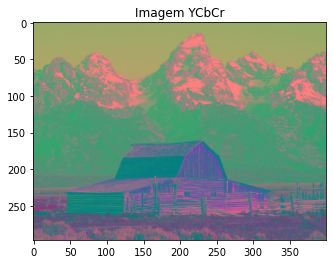

In [25]:
image = read_image('./imagens/barn_mountains.bmp')
first_pixel = image[0, 0]
image = convert_rgb_to_ycbcr(image)
plot_image(np.uint8(image), title='Imagem YCbCr')

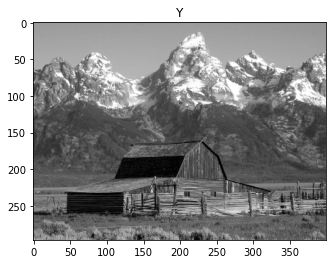

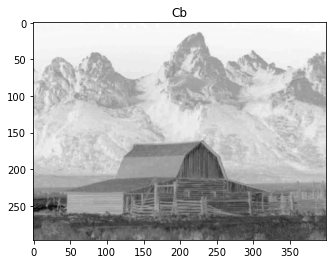

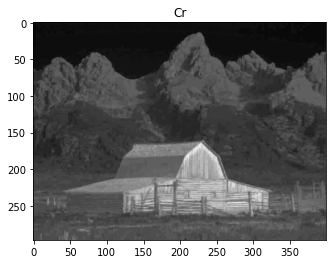

In [26]:
plot_image(image[:, :, 0], title='Y')

#plot_image(image[:, :, 1], create_colormap([(131/255, 145/255, 57/255), (130/255, 116/255, 203/255)]), 'Cb')
#plot_image(image[:, :, 2], create_colormap([(63/255, 134/255, 110/255), (170/255, 80/255, 111/255)]), 'Cr')

plot_image(image[:, :, 1], title='Cb')
plot_image(image[:, :, 2], title='Cr')


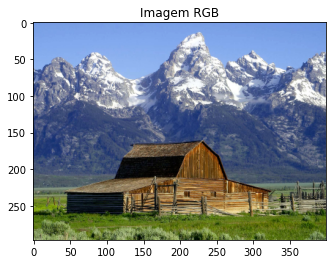

In [27]:
image = convert_ycbcr_to_rgb(image)
plot_image(image, title='Imagem RGB')

No modelo RGB, todos os canais contém luminância. Esta redundância é eliminada no modelo YCbCr, guardando a informação sobre a luminância apenas no canal Y. Os restantes canais, Cb e Cr, guardam a informação acerca da variação de azul e vermelho, respetivamente, relativamente à luma (crominância azul e crominância vermelha). 
Assim sendo, nos canais Cb e Cr é visível um menor detalhe que as torna mais propícias a maiores níveis de compressão.

## Exercício 6

A função de downsampling foi aplicada paneas aos canais Cb e Cr da imagem, uma vez que as alterações feitas nestes canais não serão tão percetíveis ao olho humano. O canal Y mantém-se inalterado para não perder o detalhe da imagem (luminância).

In [28]:
def downsampling(image, ratio, interpolation=False):
    
    ratios = {
        (4, 4, 4): (1, 1),
        (4, 4, 0): (1, 0.5),
        (4, 2, 2): (0.5, 1),
        (4, 2, 0): (0.5, 0.5),
        (4, 1, 1): (0.25, 1),
        (4, 1, 0): (0.25, 0.25)
    }

    scale_x, scale_y = ratios[ratio]

    if scale_x == 1 and scale_y == 1:
        return (image[:, :, 0], image[:, :, 1], image[:, :, 2])
    
    step_x = int(1//scale_x)
    step_y = int(1//scale_y)
    
    if interpolation:
        return (image[:, :, 0],
                cv2.resize(image[:, :, 1], None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR),
                cv2.resize(image[:, :, 2], None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR))
    else:
        return (image[:, :, 0], image[::step_y, ::step_x, 1], image[::step_y, ::step_x, 2])

In [29]:
def upsampling(y, cb, cr, ratio, interpolation=False):
    ratios = {
        (4, 4, 4): (1, 1),          # multipla de 8
        (4, 4, 0): (1, 0.5),        # multipla de 16
        (4, 2, 2): (0.5, 1),        # multipla de 16
        (4, 2, 0): (0.5, 0.5),      # multipla de 16
        (4, 1, 1): (0.25, 1),       # multipla de 32
        (4, 1, 0): (0.25, 0.25)     # multipla de 32
    }

    scale_x, scale_y = ratios[ratio]

    if scale_x == 1 and scale_y == 1:
        return (y, cb, cr)
    
    step_x = int(1//scale_x)
    step_y = int(1//scale_y)

    if interpolation:
        return (y,
            cv2.resize(cb, None, fx=step_x, fy=step_y, interpolation=cv2.INTER_LINEAR),
            cv2.resize(cr, None, fx=step_x, fy=step_y, interpolation=cv2.INTER_LINEAR))
    else:
        upsampled_cb = np.repeat(cb, step_x, axis=1)
        upsampled_cb = np.repeat(upsampled_cb, step_y, axis=0)

        upsampled_cr = np.repeat(cr, step_x, axis=1)
        upsampled_cr = np.repeat(upsampled_cr, step_y, axis=0)

        return (y, upsampled_cb, upsampled_cr)

#### 4:2:0

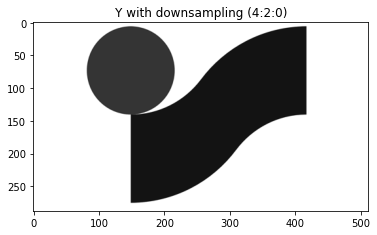

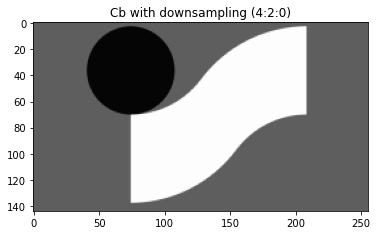

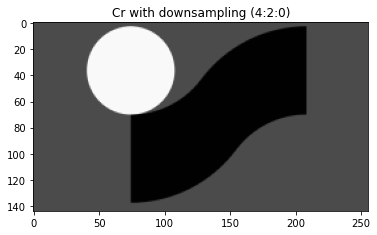

In [30]:
image_rgb = read_image('./imagens/logo.bmp')
size = image_rgb.shape
image = convert_rgb_to_ycbcr(add_padding(image_rgb))
# ratio 4:2:0
ratio = (4, 2, 0)
y, cb, cr = downsampling(image, ratio, True)
plot_image(y, title="Y with downsampling (4:2:0)")
plot_image(cb, title="Cb with downsampling (4:2:0)")
plot_image(cr, title="Cr with downsampling (4:2:0)")

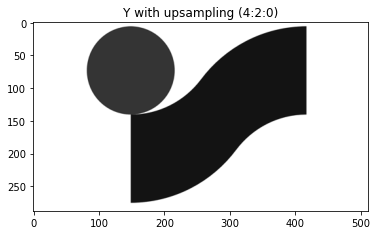

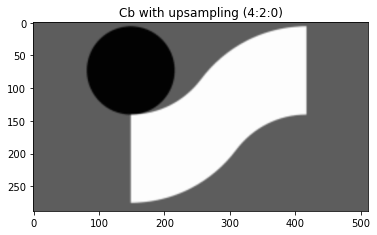

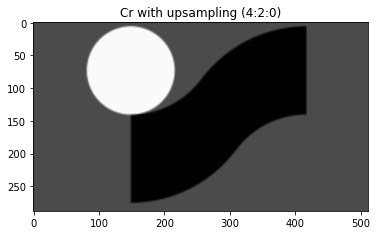

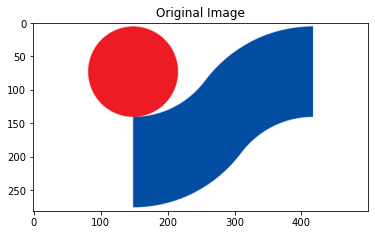

(281, 500, 3)
(281, 500, 3)


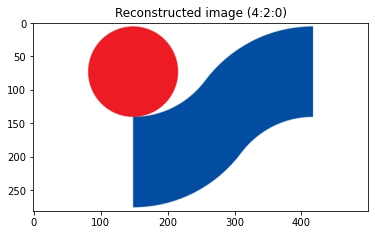

In [31]:
y, cb, cr = upsampling(y, cb, cr, ratio, True)
plot_image(y, title="Y with upsampling (4:2:0)")
plot_image(cb, title="Cb with upsampling (4:2:0)")
plot_image(cr, title="Cr with upsampling (4:2:0)")

plot_image(image_rgb, title="Original Image")
final_image = revert_padding(convert_ycbcr_to_rgb(get_image_from_channels((y, cb, cr))), size[0], size[1])
print(final_image.shape)
print(size)
plt.imsave('final_interp_420.bmp',final_image)
plot_image(final_image, title='Reconstructed image (4:2:0)')

Como se pode observar, ao usar o rácio 4:2:0, ou seja, reduzindo o número de colunas e linhas para metade (passo de 2) dos canais Cb e Cr, conseguimos comprimir estes canais para 25% do seu tamanho original. 

Ao utilizar interpolação quer no downsampling quer no upsampling, é possível verificar que a imagem final se aproxima mais da original. Enquanto que, sem interpolação, a imagem final não fica tão suave, notando-se até alguns "degraus", ou seja, perda de alguma informação, especialmente na imagem logo.bmp dado que apresenta maiores constrastes.

#### 4:2:2

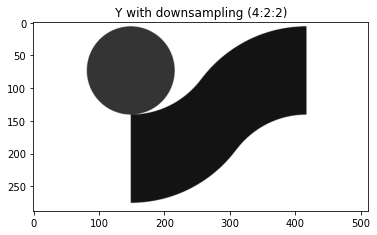

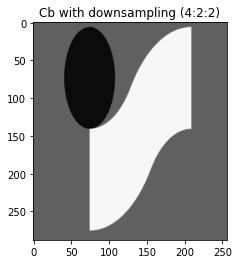

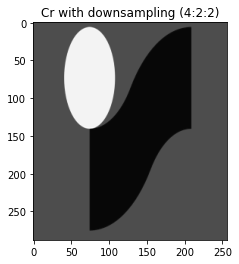

In [32]:
# ratio 4:2:2
ratio = (4,2,2)
y, cb, cr = downsampling(image, ratio, True)
plot_image(y, title="Y with downsampling (4:2:2)")
plot_image(cb, title="Cb with downsampling (4:2:2)")
plot_image(cr, title="Cr with downsampling (4:2:2)")

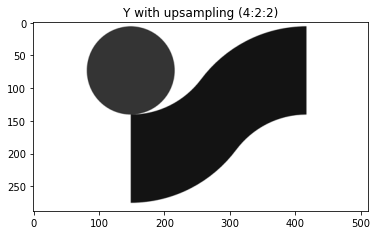

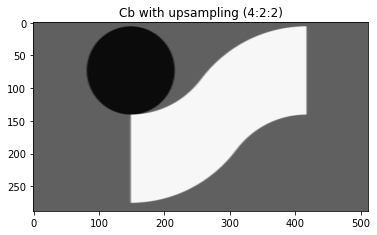

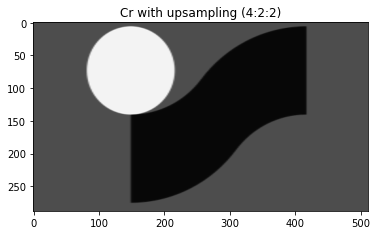

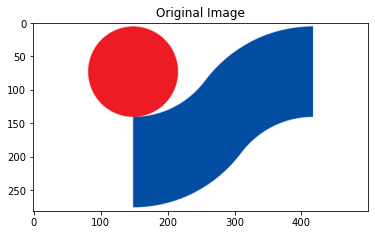

(281, 500, 3)
(281, 500, 3)


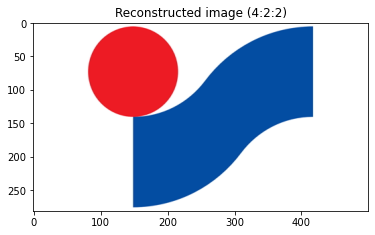

In [33]:
y, cb, cr = upsampling(y, cb, cr, ratio, True)
plot_image(y, title="Y with upsampling (4:2:2)")
plot_image(cb, title="Cb with upsampling (4:2:2)")
plot_image(cr, title="Cr with upsampling (4:2:2)")

plot_image(image_rgb , title='Original Image')
final_image = revert_padding(convert_ycbcr_to_rgb(get_image_from_channels((y, cb, cr))), size[0], size[1])
print(final_image.shape)
print(size)
plt.imsave('./imagens/final_interp_422.bmp',final_image)
plot_image(final_image, title='Reconstructed image (4:2:2)')

Como se pode observar, ao usar o rácio 4:2:2, ou seja, reduzindo o número de colunas para metade (passo de 2) dos canais Cb e Cr, conseguimos comprimir estes canais para 50% do seu tamanho original.

Ao utilizar interpolação quer no downsampling quer no upsampling, é possível verificar que a imagem final se aproxima mais da original, apesar de, na imagem logo.bmp, por não ter muito detalhe (não é foto-realista), apresentar um contorno vermelho mais carregado em volta do círculo. Enquanto que, sem interpolação, a imagem final não fica tão suave, notando-se até alguns "degraus", especialmente na imagem logo.bmp dado que apresenta maiores constrastes. É de realçar, que a imagem, quer com ou sem interpolação, apresenta a mesma taxa de compressão.

Nas imagens foto-realistas, a perda de informação das sub-amostragens não é tão notória quendo comparada com o mesmo tipo de sub-amostragem em imagens gráficas vetoriais.

Comparando os rácios 4:2:0 e 4:2:2, concluí-se que, como era de esperar, o rácio 4:2:0 apresenta piores resultados visualmente que o rácio 4:2:2, quer com interpolação quer sem interpolação. Porém, essas diferenças são minínimas, apenas se distinguíndo mais quando se faz zoom das imagens.

### Exercicio 7.1.1.

In [34]:
def get_dct(channel):
    return fft.dct(fft.dct(channel, norm="ortho").T, norm="ortho").T

In [35]:
def get_inverse_dct(channel):
    return fft.idct(fft.idct(channel, norm="ortho").T, norm="ortho").T

### Exercício 7.1.2.

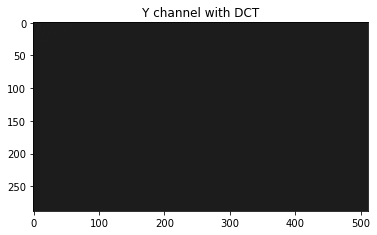

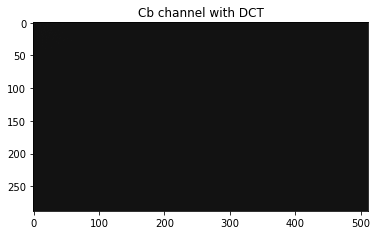

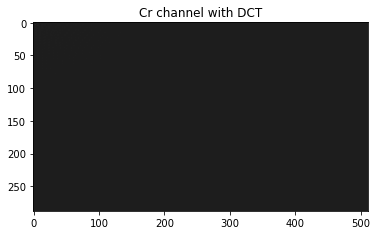

In [36]:
image_rgb = read_image('./imagens/logo.bmp')
size = image_rgb.shape
image = convert_rgb_to_ycbcr(add_padding(image_rgb))

y_d = get_dct(image[:, :, 0])
cb_d = get_dct(image[:, :, 1])
cr_d = get_dct(image[:, :, 2])

plot_image(y_d, title='Y channel with DCT')
plot_image(cb_d, title='Cb channel with DCT')
plot_image(cr_d, title='Cr channel with DCT')

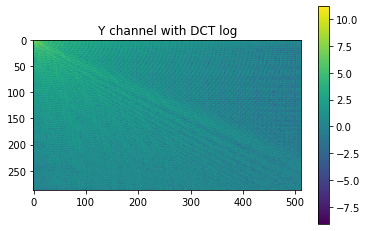

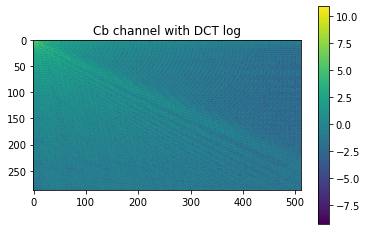

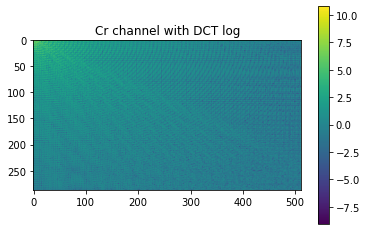

In [37]:
y_d_log = np.log(np.abs(y_d) + 0.0001)
cb_d_log = np.log(np.abs(cb_d) + 0.0001)
cr_d_log = np.log(np.abs(cr_d) + 0.0001)

plot_image_colorbar(y_d_log, title='Y channel with DCT log')
plot_image_colorbar(cb_d_log, title='Cb channel with DCT log')
plot_image_colorbar(cr_d_log, title='Cr channel with DCT log')

Ao utilizar a DCT, há uma compactação da energia num número menor de coeficientes. Por este motivo, poderá ser usado um algoritmo de compressão entrópica (RLE, por exemplo) para eliminar a redundância que existe nas altas frequências. Para aumentar ainda mais a redundância nestas frequências, poderá ser usado um processo de quantização para aproximar os valores (este processo vai levar à perda de informação). 

In [38]:
def plot_compared_images(image1, image2, title1, title2):
    plt.figure() 
    fig, axs = plt.subplots(1, 2)
    axs[0].set_title(title1)
    axs[0].imshow(image1, graymap)

    axs[1].set_title(title2)
    axs[1].imshow(image2, graymap)
    plt.show()

<Figure size 432x288 with 0 Axes>

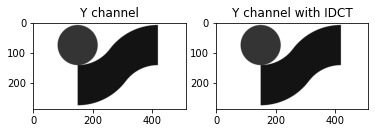

<Figure size 432x288 with 0 Axes>

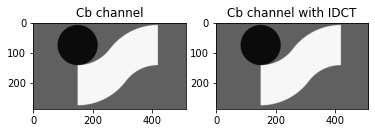

<Figure size 432x288 with 0 Axes>

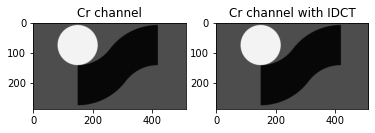

In [39]:
y_di = get_inverse_dct(y_d)
cb_di = get_inverse_dct(cb_d)
cr_di = get_inverse_dct(cr_d)

plot_compared_images(image[:, :, 0], y_di, 'Y channel', 'Y channel with IDCT')
plot_compared_images(image[:, :, 1], cb_di, 'Cb channel', 'Cb channel with IDCT')
plot_compared_images(image[:, :, 2], cr_di, 'Cr channel', 'Cr channel with IDCT')

### Exercício 7.1.3

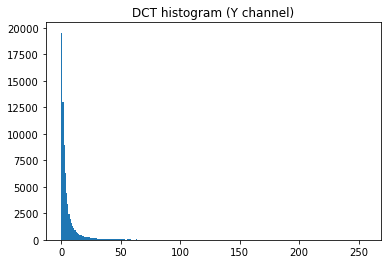

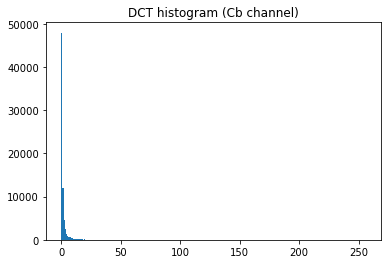

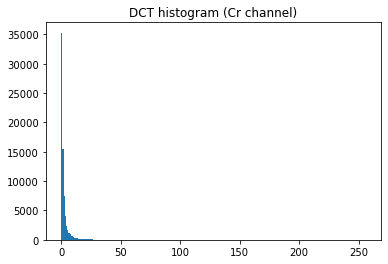

In [40]:
plt.hist(y_d.flatten(),256,[0,256])
plt.title("DCT histogram (Y channel)")
plt.show()
plt.hist(cb_d.flatten(),256,[0,256])
plt.title("DCT histogram (Cb channel)")
plt.show()
plt.hist(cr_d.flatten(),256,[0,256])
plt.title("DCT histogram (Cr channel)")
plt.show()

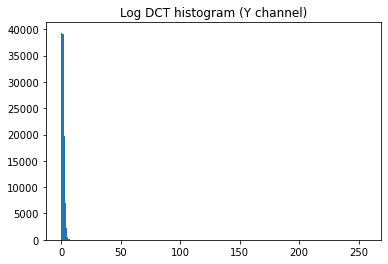

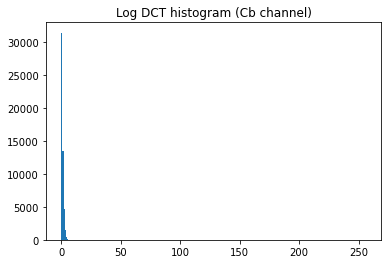

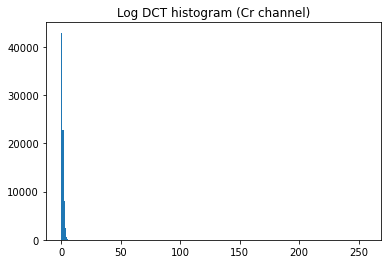

In [41]:
plt.hist(y_d_log.flatten(),256,[0,256])
plt.title("Log DCT histogram (Y channel)")
plt.show()
plt.hist(cb_d_log.flatten(),256,[0,256])
plt.title("Log DCT histogram (Cb channel)")
plt.show()
plt.hist(cr_d_log.flatten(),256,[0,256])
plt.title("Log DCT histogram (Cr channel)")
plt.show()

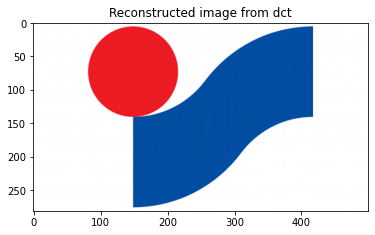

In [42]:
# Inverse
inverse_image = revert_padding(convert_ycbcr_to_rgb(get_image_from_channels((y_di, cb_di, cr_di))), size[0], size[1])
plot_image(inverse_image, title="Reconstructed image from dct")

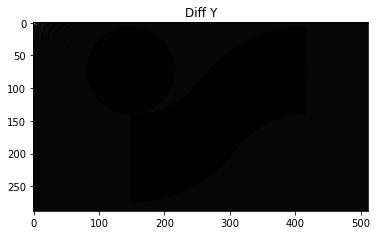

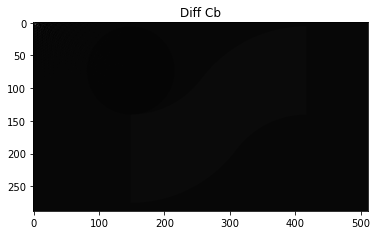

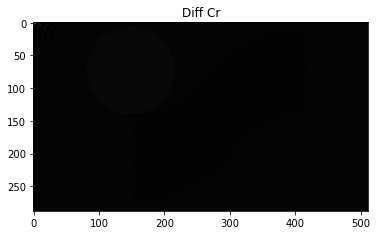

In [43]:
diff_image_y = y_di - y_d
diff_image_y[diff_image_y < 0.000001] = 0
plot_image(diff_image_y, title = 'Diff Y')

diff_image_cb = cb_di - cb_d 
diff_image_cb[diff_image_cb < 0.000001] = 0
plot_image(diff_image_cb, title = 'Diff Cb')

diff_image_cr = cr_di - cr_d
diff_image_cr[diff_image_cr < 0.000001] = 0
plot_image(diff_image_cr, title = 'Diff Cr')


## 7.2

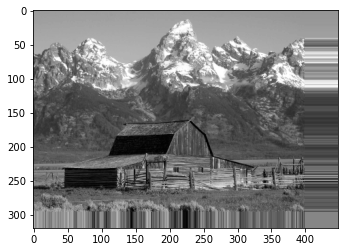

In [61]:
image_rgb = read_image('./imagens/barn_mountains.bmp')
size = image_rgb.shape
image = convert_rgb_to_ycbcr(add_padding(image_rgb, 64))

y = image[:, :, 0]
plot_image(y)
cb = image[:, :, 1]
cr = image[:, :, 2]

In [62]:
def dct_block(channel, bs):
    size = channel.shape
    dct = np.zeros(size)
    for i in np.r_[:size[0]:bs]:
        for j in np.r_[:size[1]:bs]:
            dct[i:(i+bs),j:(j+bs)] = get_dct(channel[i:(i+bs),j:(j+bs)])
    return dct

In [63]:
def idct_block(channel, bs):
    size = channel.shape
    idct = np.zeros(size)
    for i in np.r_[:size[0]:bs]:
        for j in np.r_[:size[1]:bs]:
            idct[i:(i+bs),j:(j+bs)] = get_inverse_dct(channel[i:(i+bs),j:(j+bs)])
    return idct

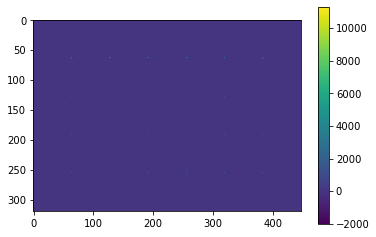

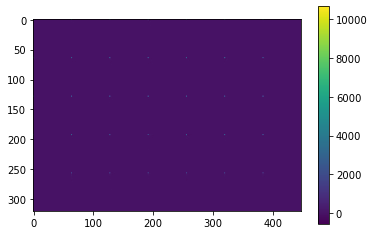

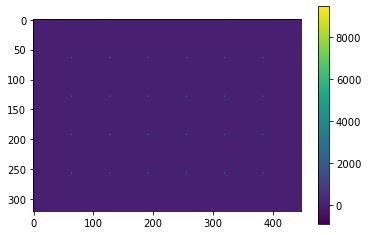

In [64]:
y_d_block = dct_block(y, 64)
cb_d_block = dct_block(cb, 64)
cr_d_block = dct_block(cr, 64)
plot_image_colorbar(y_d_block)
plot_image_colorbar(cb_d_block)
plot_image_colorbar(cr_d_block)

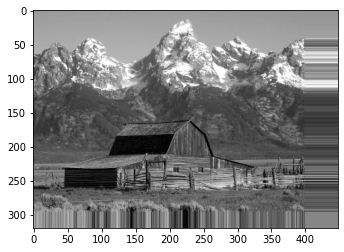

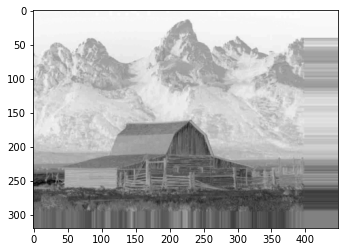

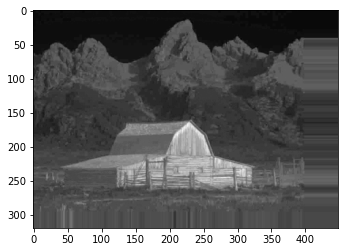

In [65]:
plot_image(idct_block(y_d_block, 64))
plot_image(idct_block(cb_d_block, 64))
plot_image(idct_block(cr_d_block, 64))

## Exercício 2

In [66]:
def encoder(image_name, colormap, ratio, interpolation):
    original = read_image(image_name)
    plot_image(original, title="Original image")
    shape = original[:, :, 0].shape
    """
    r, g, b = get_image_rgb(image)

    plot_image(r, create_colormap(colormap), 'R')
    plot_image(g, create_colormap(colormap), 'G')
    plot_image(b, create_colormap(colormap), 'B')

    """
    image = add_padding(original)
    image = convert_rgb_to_ycbcr(image)
    y, cb, cr = downsampling(image, ratio, interpolation)
    y_d = get_dct(y)
    cb_d = get_dct(cb)
    cr_d = get_dct(cr)
    return (y_d, cb_d, cr_d), shape

In [67]:
def decoder(channels, size, ratio, interpolation):
    y_di = get_inverse_dct(channels[0])
    cb_di = get_inverse_dct(channels[1])
    cr_di = get_inverse_dct(channels[2])
    y, cb, cr = upsampling(y_di, cb_di, cr_di, ratio, interpolation)
    image = get_image_from_channels((y, cb, cr))
    image = convert_ycbcr_to_rgb(image)
    image = revert_padding(image, size[0], size[1])
    plot_image(image, title="Reconstructed Image")

    return image

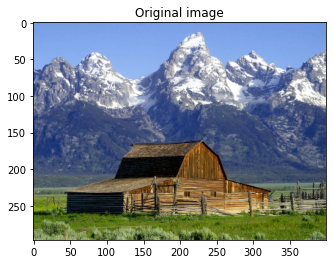

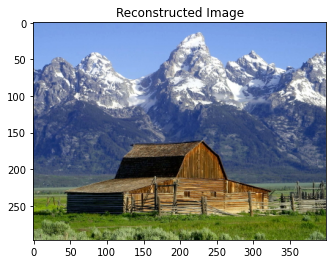

In [68]:
channels, shape = encoder("./imagens/barn_mountains.bmp", colormap=[], ratio=(4, 2, 2), interpolation=True)

image = decoder(channels, shape, ratio=(4, 2, 2), interpolation=True)